## Question 6 : Histogram Equalisation and Histogram Matching

In [2]:
# importing all the neccessary libraries. dont forget to mount the drive

import numpy as np
import cv2 # to read files / images using cv2
import os #importing operating system 
import matplotlib.pyplot as plt
import matplotlib.image as img
from google.colab.patches import cv2_imshow # in new version cv2.imshow doesnt work
IMAGES_FOLDER_PATH = "/content/drive/My Drive/images" # creating a shorter name to store the path

In [5]:
#importing images
hist1= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"hist.jpg")) 
map= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"Map.jpg"))
si= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"satellite_img.jpg")) #satellite image
pr= cv2.imread(os.path.join(IMAGES_FOLDER_PATH,"practice_range1.jpg")) #practicerange

In [6]:
#converting images to grayscale
histgray = cv2.cvtColor(hist1, cv2.COLOR_BGR2GRAY)
histmap = cv2.cvtColor(map, cv2.COLOR_BGR2GRAY)
histsi = cv2.cvtColor(si, cv2.COLOR_BGR2GRAY)
histpr = cv2.cvtColor(pr, cv2.COLOR_BGR2GRAY)

<Figure size 1440x1440 with 0 Axes>

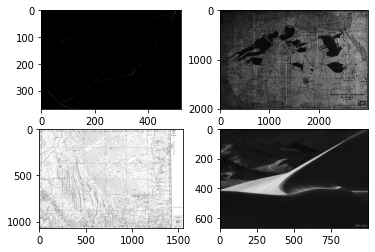

In [7]:
# displaying images
fig = plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(histgray,cmap='gray')
axs[0,1].imshow(histmap,cmap='gray')
axs[1,0].imshow(histsi,cmap='gray')
axs[1,1].imshow(histpr,cmap='gray')


In [8]:
def histEqualization(im):

  hist,bins = np.histogram(im.flatten(),256,[0,256])
  l,b = im.shape
  totalpixel = l*b
  normalisedhist = hist/totalpixel
  normalisedcdf = np.zeros(256, dtype=float)
  normalisedcdf[0] = normalisedhist[0]
  
  for i in range(1, normalisedhist.size):
    normalisedcdf[i] = normalisedcdf[i-1] + normalisedhist[i]
  
  mappingvalues = np.zeros(256, dtype=int) #an array of 256 zeroes
  new_image = np.zeros(im.size, dtype=int) #an array of 256 zeroes, to be used as a base to map and create new image
  grey_levels = 256
    
  for i in range(grey_levels):
        mappingvalues[i] = np.around(255*normalisedcdf[i])
   
  flattenedim = im.flatten()

  for i in range(im.size):
        new_image[i] = mappingvalues[flattenedim[i]]

  final = new_image.reshape(l,b)
  return final

In [9]:
HE_hist = histEqualization(histgray) #histogram equalisated grayscale hist image
HE_pr = histEqualization(histpr) #histogram equalisated grayscale practice range image


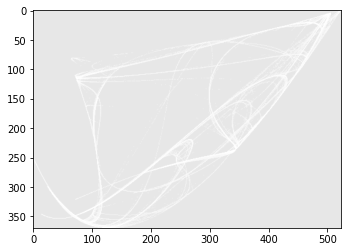

In [10]:
plt.imshow(HE_hist, cmap='gray', vmin=0, vmax=255)

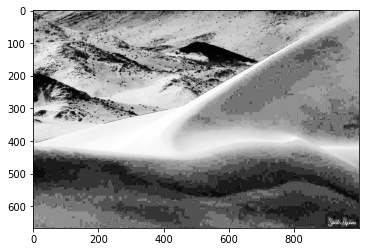

In [11]:
plt.imshow(HE_pr, cmap='gray', vmin=0, vmax=255)

In [12]:
def histMatching1 (inputimage, ri): # create normalised cdf of reference input and map the inputimage using this normalised cdf of reference image
  
  #histogram and normalised cdf of input image:
  grey_levels = 256

  inputi = np.copy(inputimage)
  hist_inputi,bins_inputi = np.histogram(inputi.flatten(),256,[0,256])
  l_inputi,b_inputi = inputi.shape
  totalpixel_inputi = l_inputi*b_inputi
  normalisedhist_ofinputi = hist_inputi/totalpixel_inputi
  normalisedcdf_ofinputi = np.zeros(256, dtype=float)
  normalisedcdf_ofinputi[0] = normalisedhist_ofinputi[0]
  
  for i in range(1, normalisedhist_ofinputi.size):
    normalisedcdf_ofinputi[i] = normalisedcdf_ofinputi[i-1] + normalisedhist_ofinputi[i]

  mappingvaluesofinputimage = np.zeros(256, dtype=float)
  
  for i in range(grey_levels):
       mappingvaluesofinputimage[i] = np.ceil(255*normalisedcdf_ofinputi[i])

  #histogram and normalised cdf of reference image :
  

  im = np.copy(ri)
  hist,bins = np.histogram(im.flatten(),256,[0,256])
  l,b = im.shape
  totalpixel = l*b
  normalisedhistofri = hist/totalpixel
  normalisedcdfofri = np.zeros(256, dtype=float)
  normalisedcdfofri[0] = normalisedhistofri[0]

  
  
  for i in range(1, normalisedhistofri.size):
    normalisedcdfofri[i] = normalisedcdfofri[i-1] + normalisedhistofri[i]

  mappingvaluesofri = np.zeros(256, dtype=int)

    #creating reverse mapping function:
  for i in range(grey_levels):
        mappingvaluesofri[i] = np.ceil(255*normalisedcdfofri[i])

  reversemapping = np.zeros(256, dtype=float)

  for i in range(grey_levels):
      reversemapping[mappingvaluesofri[i]] = i

  reversemapping_full = []
  count = 0
    
  for i in reversemapping:
      if (i!= 0) :
        count+= 1
        reversemapping_full+= ([i]*count)
        count = 0
      else:
        count+= 1
     

  
  #mappingvaluesofri = np.zeros(256, dtype=int) #an array of 256 zeroes
  new_imageofinput = np.zeros(inputimage.size, dtype=int) #an array of 256 zeroes, to be used as a base to map and create new image
  grey_levels = 256
    
 # for i in range(grey_levels):
        #mappingvaluesofri[i] = np.ceil(255*normalisedcdfofri[i])

  flattenedinputimage = inputimage.flatten()

  for i in range(inputimage.size):
        new_imageofinput[i] = reversemapping_full[flattenedinputimage[i]]

  finalmatched = new_imageofinput.reshape(l_inputi,b_inputi)
  return finalmatched

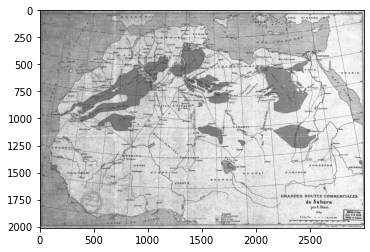

In [13]:
matched = histMatching1(histmap, histsi)

plt.imshow(matched, cmap='gray', vmin=0, vmax=255)

## Implementation and Formulae of Histogram equalisation and matching:

### 1) For histogram equalisation we map original intensity 'r' to a transformed intensity 's', using a function s = T(r).
### This T(r) is based on CDF ie cummulative distribution function of normalised histogram of the original image.
### s = round $((L-1)\sum_{w=0}^{r} P[w])$, where P[w] is the Probability/Normalised valued from normalised histogram for intensity w, and $\sum_{w=0}^{r} P[w])$, is its CDF.

###2) For histogram matching, we try to change the normalised cdf of original image to match a normalised cdf of given reference image.
### s = T(r) , we map/transform original intensity 'r' to intensity 's' using same 'T' as explained above. 
### s = G(z), we map/transform intensity values 'z' of given reference image to s, using G(z) which is same as T.
### then we try to find value of z, for some value of s, for some value of r. ie reverse map G(z)
### $z = G^{-1}(T(r))$